# HMC法

In [20]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from numpy.random import choice
from scipy import integrate

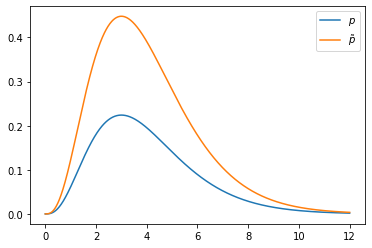

In [21]:
# [0,12]の1000個のデータ
range_min,range_max=0,12
n_samples=1000
x=np.linspace(range_min, range_max,n_samples)

norm=stats.norm(loc=0, scale=1)
gamma=stats.gamma(a=4)
# 正規化定数,
Z_p=2
# p(z),gauss
def childa_p(z):
    return gamma.pdf(z)*Z_p
    # return norm.pdf(z)*Z_p

# p(z),正規化された値，サンプリングできない，特定の範囲では厳密には確率分布ではない
p_data=childa_p(x)/Z_p
plt.plot(x,p_data,label='$p$')

# サンプリング可能な~p(z)
childa_p_data=childa_p(x)
plt.plot(x,childa_p_data,label='$\~p$')

plt.legend()
plt.show()

In [22]:
global mu, sigma
mu=0
sigma=1

In [23]:
def log_childa_p(z):
    # 
    return np.log(childa_p(z))

def log_normal(x, mu, sigma):
    return -0.5*np.log(2*np.pi*sigma**2) - (x-mu)**2/(2*sigma**2)

# 運動エネルギー
def momentum(p, tau):
    return p**2/(2*tau**2)

# ハミルトニアン
# 運動エネルギーとポテンシャルエネルギーの和
def Hamiltonian(x, p, tau):
    global mu, sigma
    
    return momentum(p, tau) + (-1.*log_normal(x, mu, sigma))

# リープ・フロッグ法
def proceed_leapflog(epsilon, x, p, tau):
    global mu, sigma
    
    # Log probabilityの導関数
    def d_log_normal(x, mu, sigma):
        return -(x-mu)/sigma**2
    # 運動エネルギーの導関数
    def d_momentum(p, tau):
        return  p/tau**2
    
    x += -0.5*epsilon*(-1.*d_momentum(p, tau))
    p += epsilon*d_log_normal(x, mu, sigma)
    x += -epsilon*(-1.*d_momentum(p, tau))
    
    return x, p

In [42]:
# HMCを１ステップ実行するサブルーチン
def hmc(x, tau, epsilon, T):
    '''
    
    :param x: 
    :param tau: 運動量pが従う正規分布の分散
    :param epsilon: リープ・フロッグ法の1ステップあたりの状態変化の大きさ
    :param T: リープ・フロッグ法の状態変化の回数
    :return: 
    '''

    p = np.random.normal(0, tau, size=1)[0]
    p_new = p
    x_new= x
    for t in range(T):
        x_new, p_new = proceed_leapflog(epsilon, x_new, p_new, tau)
        
    r = np.exp(Hamiltonian(x, p, tau) - Hamiltonian(x_new, p_new, tau))
    u = np.random.uniform()
    if u < r:
        x_accepted = x_new
    else:
        x_accepted = x
        
    return x_accepted

def proceed_HMC(tau, epsilon, T, ite, init):
    # HMCを実行する関数
    # sample 初期化
    sample=init
    samples=[]
    for i in range(ite):
        sample=hmc(sample, tau, epsilon, T)
        samples.append(sample)
    
    return samples

In [43]:
init = 0
theta = proceed_HMC(tau=2, epsilon=0.1, T=10, ite=1000, init=init)

(array([0.03368619, 0.        , 0.01684309, 0.01684309, 0.        ,
        0.        , 0.        , 0.03368619, 0.        , 0.        ,
        0.        , 0.03368619, 0.03368619, 0.        , 0.03368619,
        0.03368619, 0.01684309, 0.05052928, 0.03368619, 0.08421547,
        0.05052928, 0.11790165, 0.06737237, 0.08421547, 0.13474475,
        0.15158784, 0.15158784, 0.20211712, 0.15158784, 0.18527403,
        0.18527403, 0.11790165, 0.23580331, 0.2526464 , 0.2526464 ,
        0.28633259, 0.20211712, 0.35370496, 0.45476352, 0.42107734,
        0.21896021, 0.30317568, 0.32001877, 0.35370496, 0.32001877,
        0.28633259, 0.47160662, 0.33686187, 0.42107734, 0.30317568,
        0.58950827, 0.48844971, 0.37054806, 0.42107734, 0.47160662,
        0.42107734, 0.32001877, 0.35370496, 0.32001877, 0.28633259,
        0.38739115, 0.28633259, 0.38739115, 0.21896021, 0.42107734,
        0.26948949, 0.33686187, 0.13474475, 0.23580331, 0.32001877,
        0.11790165, 0.13474475, 0.18527403, 0.15

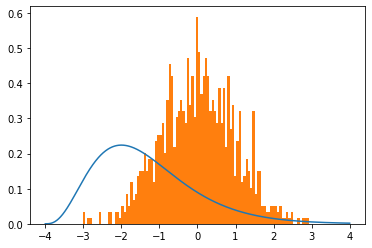

In [45]:
plt.plot(np.linspace(-4, 4,n_samples),p_data,label='$\~p$')
plt.hist(theta, bins=100,density=True)

In [26]:
# # サンプル数
# N = 1000
# #初期値
# sample=0
# samples=[]
# for i in range(N):
#     sample = sampling(sample)
#     samples.append(sample)
# plt.plot(x, p_data)
# plt.hist(samples, bins=100,density=True)
# plt.show()